In [39]:
%matplotlib inline

In [65]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Linear regresion
### first steps

####  linear eaqution or eqation of line
linear eqaution is defined as $y(x) = ax + b $ where a is the slope of line $\tan{(\phi)}$ b charctarise is the interseption

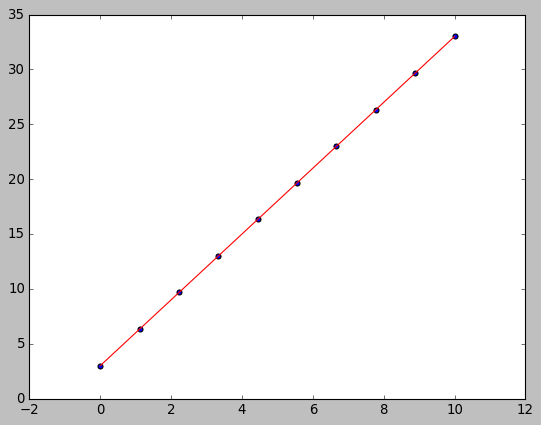

In [79]:
y_f = lambda x,a=69,b=4 : x*a+b
x_data = np.linspace(0,10,10)
#a = np.vectorize(y,x)
#y_data = [y(x,1,2) for x in x_data ]

y_data = y_f(x_data,3,3)

plt.scatter(x_data,y_data)
plt.plot(x_data,y_data,color='r')

#### let to define the linear eaqution with some noise



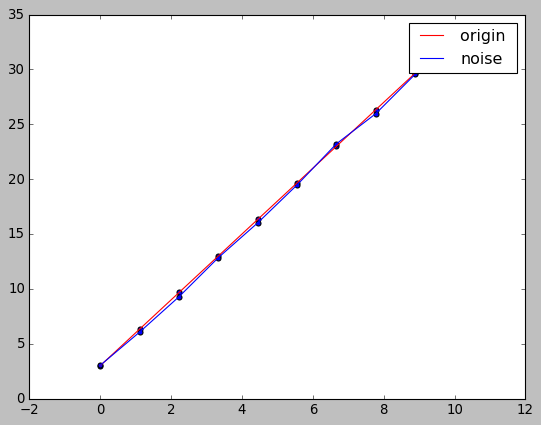

In [80]:
noise_data =np.array( [np.random.uniform(-0.5,0.5) for i in range(len(x_data))] )
# print(len(noise_data))
# print(len(x_data))
# print(type(noise_data))
# print(type(x_data))

y_data_n = y_data+noise_data

plt.scatter(x_data,y_data)
plt.plot(x_data,y_data,color='r',label = 'origin ')
plt.scatter(x_data,y_data_n)
plt.plot(x_data,y_data_n,color='b',label = 'noise')
plt.legend()
plt.show()

### cost function

Let’s do an analysis using the squared error cost function.

$$ C(a,b) = \frac{1}{2m}\sum_{i}^m(y_i - \hat{y_i})^2 $$

In [76]:
y_data = y_data_n


"""
That is the simple example of power of numpy
just to see how numpy array work with '**' and '*' and 'sum' operators
r = np.array([1,2,3])
r1 = r**2
print(r1)
r3 = (r1+r1)**2
print(r3)
print(sum(r3))

"""

    

def cost_funct(x,y,a,b):
    """
    cost function for calculation quadratic error
    """
    y_predict = y_f(x,a,b)  ## return np.array of predict result with given a , b
    #print(y_predict)
    #print(y)
    size = len(x)
    cost = (y-y_predict)**2
    return sum(cost)/(2*size)
    
    
def calculate_loss(x, y, a, b):
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)
  

In [77]:
print(cost_funct(x_data,y_data,1,2))    
print(cost_funct(x_data,y_data,1,-2))   
print(cost_funct(x_data,y_data,1,4))   
print(cost_funct(x_data,y_data,1,2))   
print(cost_funct(x_data,y_data,3,3))  

80.5090677728292
132.34633794065377
60.59043268891692
80.5090677728292
0.03003585701638517


$$\frac{\partial{C}}{\partial{a}}=\sum_i^n2x(y_i-\hat{y_i})$$
$$\frac{\partial{C}}{\partial{b}}=\sum_i^n2(y_i-\hat{y_i})$$


## lets first to do some explorion of function C(a,b)







No handles with labels found to put in legend.


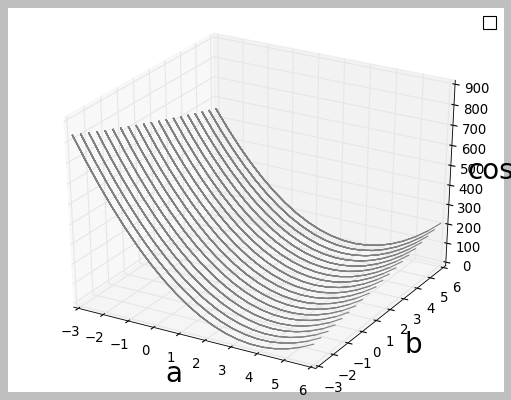

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z = np.linspace(-3,6,20)

for b in z:
    z_line = []
    x_line = []
    y_line = []
    for a in z:
      c  =  cost_funct(x_data,y_data,a,b)
      x_line.append(a)
      y_line.append(b)  
      z_line.append(c)
      ax.plot3D(x_line, y_line, z_line, 'gray')  
      
      label = 'b={}'.format(b)
    #print(p," ",j)
    #plt.plot(j,p,label = label )
   
    
    #Axes3D.plot(j, p,p)
    
ax.set_xlabel('a',fontsize=25)
ax.set_ylabel('b',fontsize=25)
ax.set_zlabel('cost',fontsize=25)
plt.legend()


## not so clear from graphic we  can see  that the min value of cost is around a=3 b=3

In [69]:
# y= a*x +b
def grad(x_data,y_data,a,b):
    size = len(x_data)
    grad_a = (a/size)*sum((a*x_data+b - y_data))
    grad_b = (1/size)*sum((a*x_data+b - y_data))
    
def calculate_gradient_d(x_data,y_data):
    a,b =-10,10
    alpha=0.01 # step size #learning size integration step
    
    

In [70]:
#y_f = lambda x,a=2,b=4 : x*a+b


def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    print("step a,b " ,new_a," ",new_b)
    return (new_a, new_b)



In [74]:
model_a, model_b = -10, 20 # Start points; can be anywhere
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x_data, y_data, model_a, model_a, alpha)
    if step % 100 == 0:
        error = calculate_loss(x_data, y_data, model_a, model_a)
        print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 


step a,b  0.44814814814814774   -8.44
Step 0: a = 0.44814814814814774, b = -8.44, J = 300.7555184677134
step a,b  2.499080932784637   0.7543703703703699
step a,b  2.9016714423614287   2.5591912208504803
step a,b  2.9806984683153916   2.9134708692780573
step a,b  2.9962111808174656   2.9830146521175447
step a,b  2.999256268827132   2.9966658391193697
step a,b  2.999854008325326   2.9993455165678764
step a,b  2.9999713423749714   2.999871527326287
step a,b  2.9999943746143463   2.999974781289975
step a,b  2.999998895757631   2.9999950496606247
step a,b  2.9999997832413126   2.999999028266715
step a,b  2.9999999574510725   2.999999809252355
step a,b  2.9999999916478033   2.999999962556944
step a,b  2.9999999983604946   2.999999992650067
step a,b  2.999999999678171   2.9999999985572354
step a,b  2.999999999936826   2.9999999997167905
step a,b  2.9999999999875993   2.999999999944407
step a,b  2.999999999997566   2.9999999999890874
step a,b  2.999999999999522   2.999999999997858
step a,b  2.

step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0
step a,b  3.0   3.0


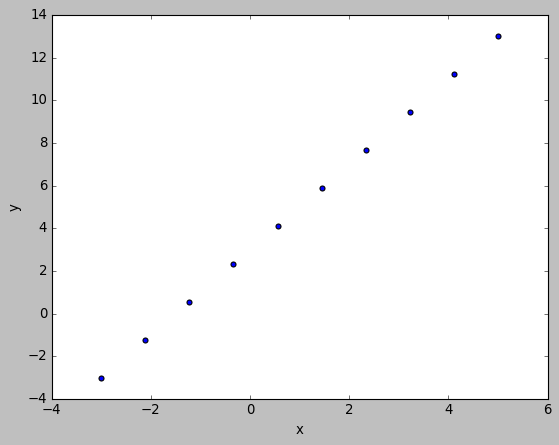

In [48]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


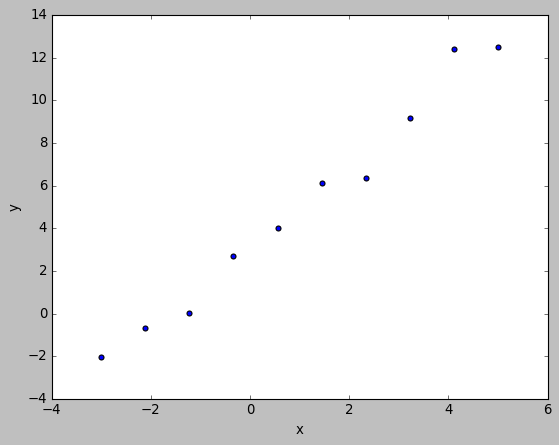

In [49]:
y_noise = np.random.normal(size = len(y))
y_with_noise = y + y_noise
plt.scatter(x, y_with_noise)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


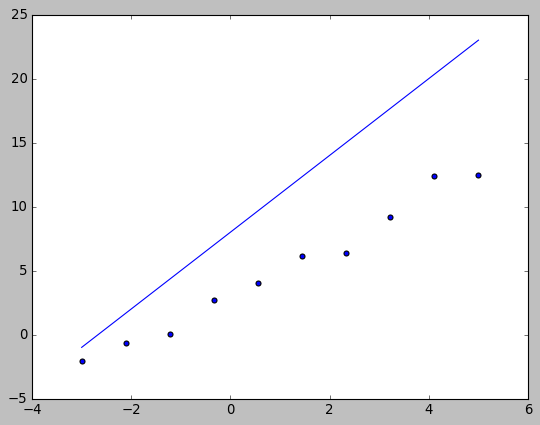

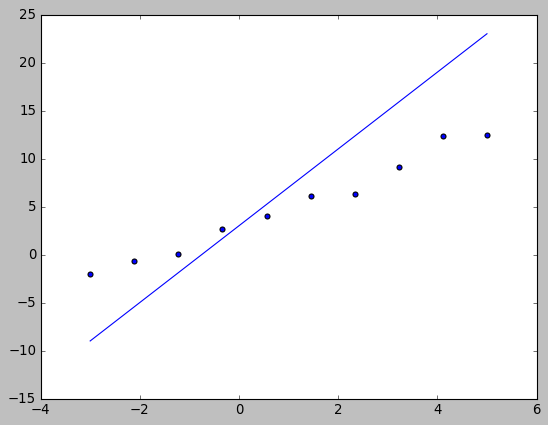

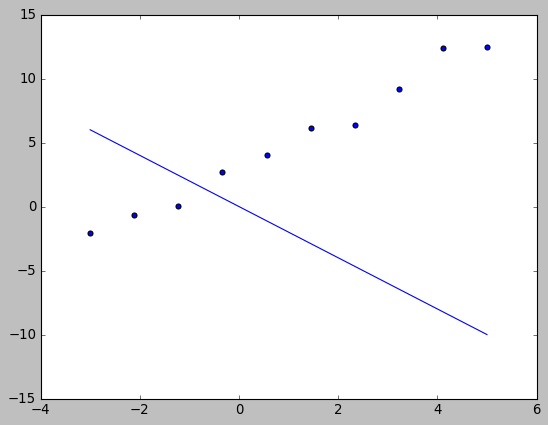

In [50]:
for y_guess in [3 * x + 8, 4 * x + 3, -2 * x]:
  plt.scatter(x, y_with_noise)
  plt.plot(x, y_guess)
  plt.show()


In [52]:
def calculate_loss(x, y, a, b):
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)


In [53]:
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(y) * np.sum(y - (a * x + b))


In [54]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)


In [56]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)
    

In [64]:
model_a, model_b = -10, 20 # Start points; can be anywhere
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_a, alpha)
    if step % 100 == 0:
        error = calculate_loss(x_data, y_data, model_a, model_a)
        print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = -7.935555555555555, b = -9.5, J = 5521.722649983318
Step 100: a = 2.117391226594531, b = 2.132695562202243, J = 35.927922911009695
Step 200: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 300: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 400: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 500: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 600: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 700: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 800: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 900: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 1000: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Final line: 2.117391304347825 * x + 2.132695652173912
